In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("LoanStats3c.csv", header=0, low_memory=False)

In [3]:
pd.options.display.max_columns = None
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,29003494,31526675,28000,28000,28000,36 months,7.12%,866.10,A,A3,attorney,5 years,MORTGAGE,324388.0,Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,331xx,FL,9.35,0,Aug-01,1,NaN,NaN,23,0,35236,38.70%,34,w,27300.03,27300.03,866.10,866.10,699.97,166.13,0.0,0.0,0.0,Nov-14,866.10,Nov-14,Oct-14,0,NaN,1
1,28913233,31436395,3000,3000,3000,36 months,11.67%,99.18,B,B4,Eligibility Worker II,6 years,MORTGAGE,41500.0,Not Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,961xx,CA,26.55,0,Sep-99,1,NaN,NaN,12,0,11749,78.90%,29,w,2930.00,2930.00,99.18,99.18,70.00,29.18,0.0,0.0,0.0,Oct-14,99.18,Nov-14,Oct-14,0,NaN,1
2,27592013,30095159,18000,18000,18000,36 months,13.98%,615.03,C,C3,LABORATORY MANAGER,8 years,MORTGAGE,165000.0,Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,937xx,CA,27.36,0,Apr-89,0,27.0,NaN,15,0,15893,60%,50,f,17594.67,17594.67,615.03,615.03,405.33,209.70,0.0,0.0,0.0,Nov-14,615.03,Nov-14,Oct-14,0,27.0,1
3,28172444,30685592,15000,15000,15000,60 months,20.20%,399.08,E,E3,Housing Counselor,1 year,RENT,67000.0,Source Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,946xx,CA,8.90,0,Sep-86,1,70.0,65.0,11,1,1997,24.40%,58,f,14853.42,14853.42,399.08,399.08,146.58,252.50,0.0,0.0,0.0,Nov-14,399.08,Nov-14,Oct-14,0,70.0,1
4,20349337,22622030,23275,23275,23275,60 months,17.57%,585.61,D,D4,Process Improvement Officer,7 years,MORTGAGE,54264.0,Not Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,352xx,AL,33.02,0,Aug-02,0,57.0,NaN,11,0,18580,59.60%,23,w,23018.82,23018.82,585.61,585.61,256.18,329.43,0.0,0.0,0.0,Nov-14,585.61,Dec-14,Oct-14,0,57.0,1


In [4]:
# drop id fields, loan amount, and fields with too many categories
df.drop(['id','member_id','funded_amnt', 'funded_amnt_inv', 'sub_grade', 
         'emp_title', 'url', 'desc', 'title', 'zip_code', 'out_prncp', 
         'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int'], 
        axis=1, inplace=True)

In [5]:
#Look at the number of categories for 'object' dtypes
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                      2
int_rate                 69
grade                     7
emp_length               11
home_ownership            4
is_inc_v                  3
issue_d                   9
loan_status               8
pymnt_plan                2
purpose                  13
addr_state               49
earliest_cr_line        627
revol_util             1126
initial_list_status       2
last_pymnt_d             10
next_pymnt_d              3
last_credit_pull_d       12
dtype: int64

In [6]:
#int rate should be a float
#favor grade over sub_grade
#emp_title has too many categories to be useful.
#emp_length looks like a useful column that we should convert to an int.
#home_ownership, is_inc_v are both helpful columns
#loan status is a determining factor if a loan becomes fully paid or charged off
#purpose is a feature with a good number of categories. 


In [7]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,161231.000000,161231.000000,1.612310e+05,161231.000000,161231.000000,161231.000000,81008.000000,28929.000000,161231.000000,161231.000000,1.612310e+05,161231.00000,161231.000000,161231.000000,161231.000000,161231.000000,161231.000000,45175.000000,161231.0
mean,14864.642190,446.003881,7.525850e+04,17.685653,0.341609,0.833078,33.436759,71.541706,11.632620,0.224324,1.603433e+04,26.09554,0.033618,0.060596,0.000606,974.164228,0.014191,43.363475,1.0
std,8412.637516,245.922837,5.740734e+04,7.733079,0.891854,1.094065,21.866078,28.736096,5.175382,0.608610,1.937634e+04,11.73985,1.034395,12.659022,0.126590,2996.476958,0.135941,22.153984,0.0
min,1000.000000,23.360000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8400.000000,267.790000,4.600000e+04,11.890000,0.000000,0.000000,15.000000,50.000000,8.000000,0.000000,6.323000e+03,18.00000,0.000000,0.000000,0.000000,274.695000,0.000000,26.000000,1.0
50%,13000.000000,387.240000,6.500000e+04,17.360000,0.000000,0.000000,30.000000,70.000000,11.000000,0.000000,1.160700e+04,24.00000,0.000000,0.000000,0.000000,402.570000,0.000000,43.000000,1.0
75%,20000.000000,585.390000,9.000000e+04,23.320000,0.000000,1.000000,49.000000,100.000000,14.000000,0.000000,2.020950e+04,33.00000,0.000000,0.000000,0.000000,623.880000,0.000000,60.000000,1.0
max,35000.000000,1409.990000,7.500000e+06,39.990000,22.000000,6.000000,188.000000,121.000000,76.000000,63.000000,1.190046e+06,121.00000,100.380000,4278.150000,42.781500,35757.360000,20.000000,188.000000,1.0


In [8]:
#there are 161,231 instances (loans) and 51 features in our loan data. 
#From intuition, factors such as credit rating, monthly debt payments as a percentage of income determine if a loan will default.
#clean our data. 

# some numerical values we are interested in are stored as strings that need to be cleaned for processing

In [9]:
#function that takes a percentage as a string and returns a float. If the value doesn't have a "%", returns a float
def pctStrFlt(pct):
    if type(pct) == float : #exception handling if pct is not a string in '##%' format
        return pct
    elif pct.strip()[-1:] == '%' :
        return float(pct.strip()[:-1])
    else : 
        return float(pct.strip())

In [10]:
#Let's preprocess our data and start with int_rate. convert from str to float.
df['new_Int'] = df['int_rate'].apply(pctStrFlt)*.01

In [11]:
#issue date is another column we want to interpret in order. Currently is formatted as Mon-YY.

In [12]:
import calendar
mo = {k : v for v, k in enumerate(calendar.month_abbr)}

In [13]:
df['issueMo'] = df['issue_d'].apply( lambda x: mo[x.strip()[:3]] )

In [14]:
df['newRevUtil'] = df['revol_util'].apply(pctStrFlt)*.01

In [15]:
df['termMo'] = df['term'].apply(lambda x: int(x.strip()[:2]))

# Descriptive Statistics

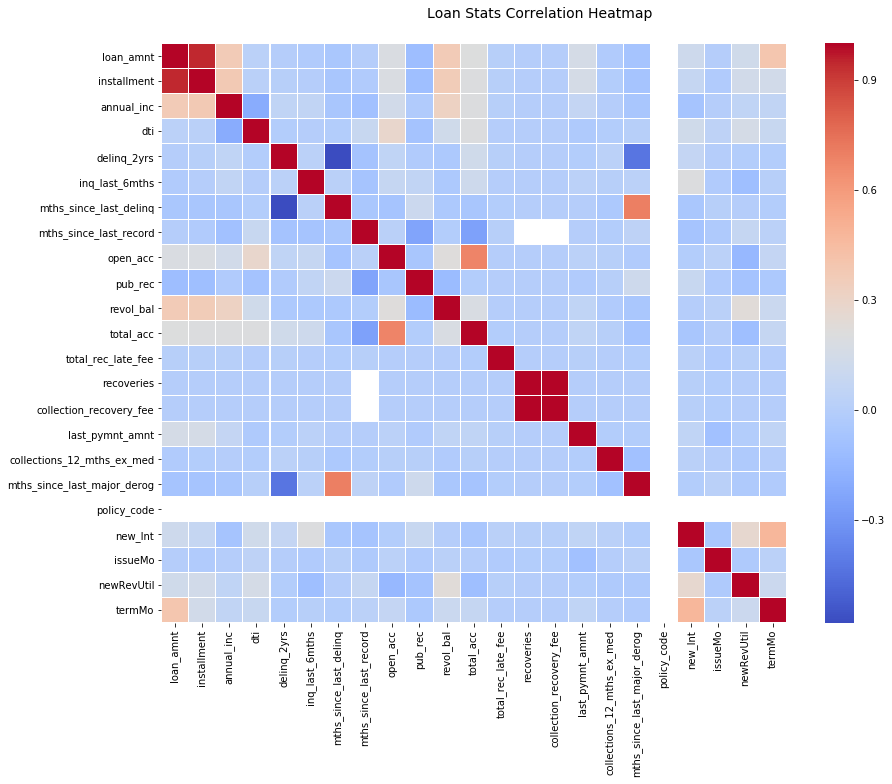

In [16]:
f, ax = plt.subplots(figsize=(14, 10))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Loan Stats Correlation Heatmap', fontsize=14)

In [17]:
df["loan_status"].value_counts()
#It would be helpful to have fewer loan status types. 
#For this analysis, grace pd and late loans will be considered bad loans.

Current               151208
Fully Paid              6922
Late (31-120 days)      1362
In Grace Period          853
Late (16-30 days)        409
Charged Off              400
Default                   76
Issued                     1
Name: loan_status, dtype: int64

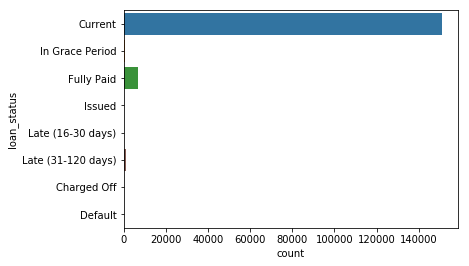

In [18]:
sns.countplot(y='loan_status', data=df)

In [19]:
#The vast majority of loans have a 'Current' loan status, followed by 'Fully Paid'

Text(0.5,1,'Interest Rate by Loan Status')

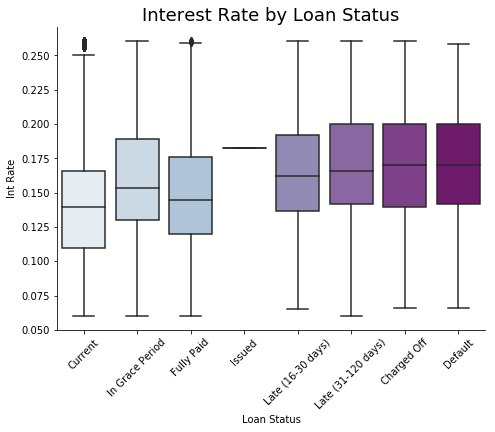

In [20]:
sns.catplot(x='loan_status', y='new_Int', data=df, kind='box', height=5, aspect=1.4, palette='BuPu')
plt.xticks(rotation=45)
plt.xlabel('Loan Status')
plt.ylabel('Int Rate')
plt.title('Interest Rate by Loan Status', fontsize=18)

In [21]:
# As expected, loans that are fully paid and current have lower interest rates than 
# claims that are late, defaulted, or charged off.

In [22]:
#will want to create a binary classifier to feed the decision tree model.
loanCat = [ 0 if (i in ['Current','Fully Paid','Issued']) else 1 for i in df['loan_status']  ]

In [23]:
df['loanCat'] = loanCat

Text(0.5,1,'Monthly Good vs Bad Loans in 2014')

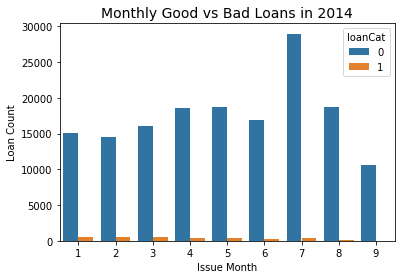

In [24]:
sns.countplot('issueMo', hue='loanCat', data=df)
plt.xlabel('Issue Month')
plt.ylabel('Loan Count')
plt.title('Monthly Good vs Bad Loans in 2014', fontsize=14)

In [25]:
# Look at the purpose feature

Text(0.5,1,'Interest Rate by Loan Purpose and Loan Category')

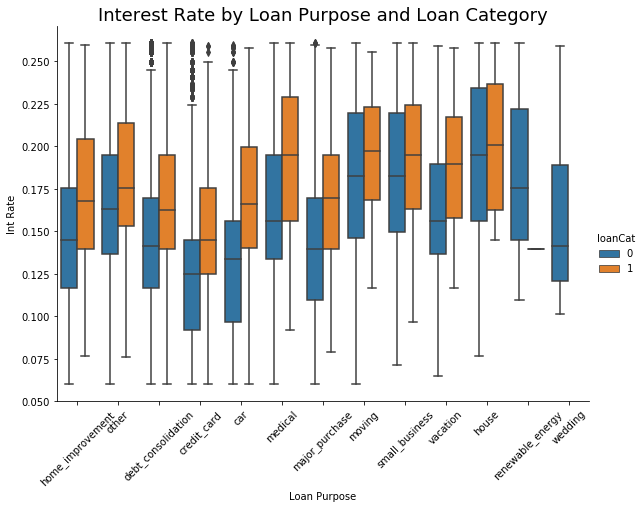

In [26]:
sns.catplot(x='purpose', y='new_Int', hue='loanCat', data=df, kind='box', height=6, aspect=1.4)
plt.xticks(rotation=45)
plt.xlabel('Loan Purpose')
plt.ylabel('Int Rate')
plt.title('Interest Rate by Loan Purpose and Loan Category', fontsize=18)

Text(0.5,1,'Loans by Purpose')

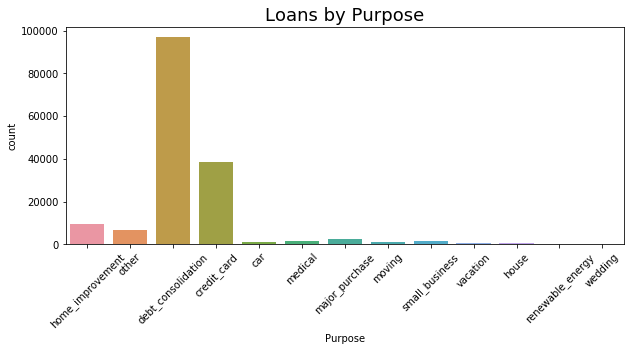

In [27]:
plt.figure(figsize=(10, 4))
sns.countplot(x='purpose', data=df)
plt.xticks(rotation=45)
plt.xlabel('Purpose')
plt.title('Loans by Purpose', fontsize=18)

In [28]:
# loans for renewable energy and weddings , while only having 4462 and 402 loans, respectively, 
# show a higher proportion of Good to bad loans.
# Lending Club should look into increasing marketing to attract loans for renewable energy and weddings. 

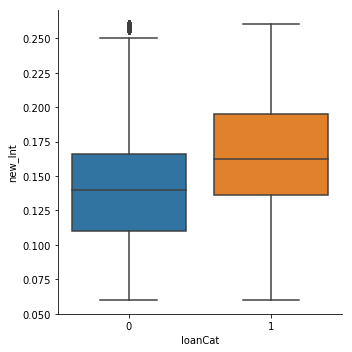

In [29]:
sns.catplot(x='loanCat', y='new_Int', data=df, kind='box')

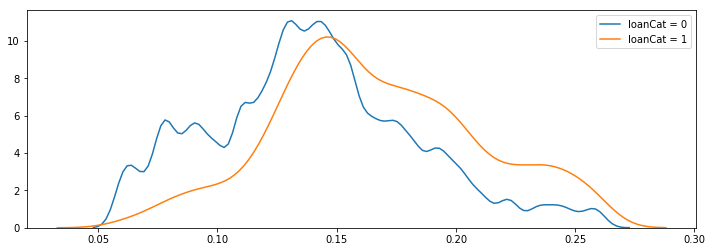

In [30]:
fig = plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[df['loanCat'] == 0, 'new_Int'], label = 'loanCat = 0')
sns.kdeplot(df.loc[df['loanCat'] == 1, 'new_Int'], label = 'loanCat = 1')

In [31]:
#We can see that bad loans have higher interest rates.

In [32]:
#let's look at several plots comparing late, defaulted, and charged off loans to fully paid loans.

Text(0,0.5,'Count')

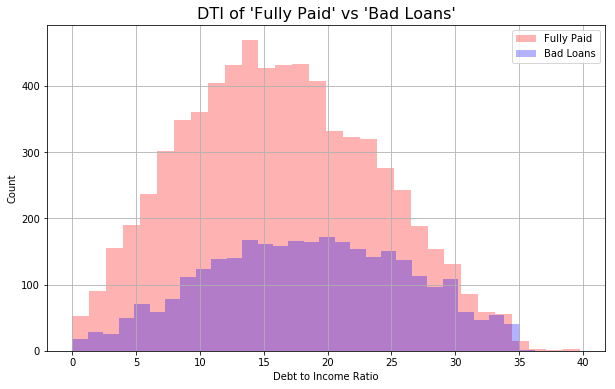

In [33]:
plt.figure(figsize=(10,6))
df[df['loan_status']=='Fully Paid']['dti'].hist(bins=30, alpha=.3, color='red', label='Fully Paid')
df[df['loanCat']==1]['dti'].hist(bins=30, alpha=.3, color='blue', label='Bad Loans')
plt.title('DTI of \'Fully Paid\' vs \'Bad Loans\'', fontsize=16)
plt.legend()
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')

In [34]:
# We can see from the above histogram that bad loans have a higher DTI than fully paid loans. 

Text(0.5,1,'Bad Loans')

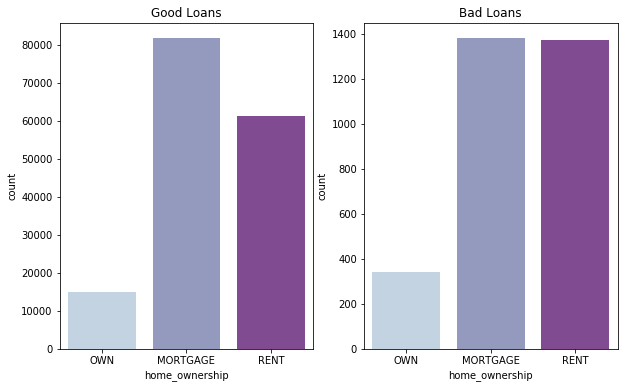

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.countplot(x='home_ownership', data=df[df['loanCat'] ==0], palette='BuPu', order=['OWN','MORTGAGE', 'RENT'], ax=ax1)
ax1.set_title('Good Loans')

sns.countplot(x='home_ownership', data=df[df['loanCat'] ==1], palette='BuPu', order=['OWN','MORTGAGE', 'RENT'], ax=ax2)
ax2.set_title('Bad Loans')

In [36]:
# Good loans have a higher percentage of people that pay mortgages over rent
# compared to bad loans that have the same percentage of people who pay a mortgage vs those who rent.

In [37]:
# In all loan purpose categories, the bad loans had a higher interest rate. 
# The exceptions to this rule are loans for renewable_energy and weddings. 

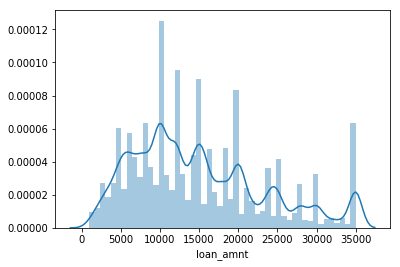

In [90]:
sns.distplot(df['loan_amnt'])

Text(-8.7,0.5,'Loan Amount')

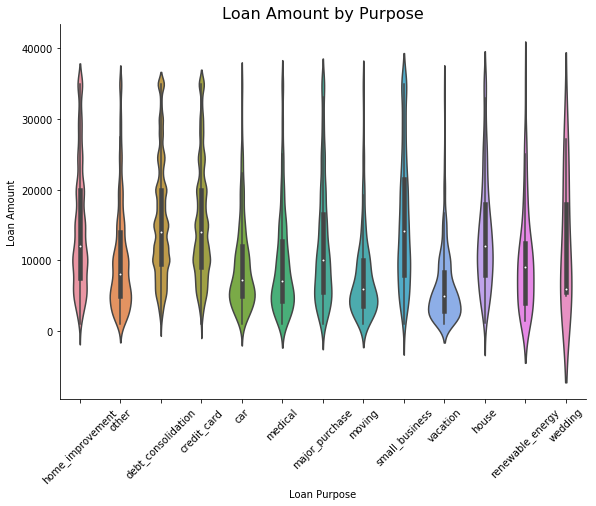

In [95]:
sns.catplot(x='purpose', y='loan_amnt', data=df, kind='violin',height=6, aspect = 1.4)
plt.xticks(rotation=45)
plt.title('Loan Amount by Purpose', fontsize=16)
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')

# Let's train a model to classify loans as good or bad

In [39]:
df['annualIncLog'] = df['annual_inc'].apply(np.log)

Text(0,0.5,'Interest Rate')

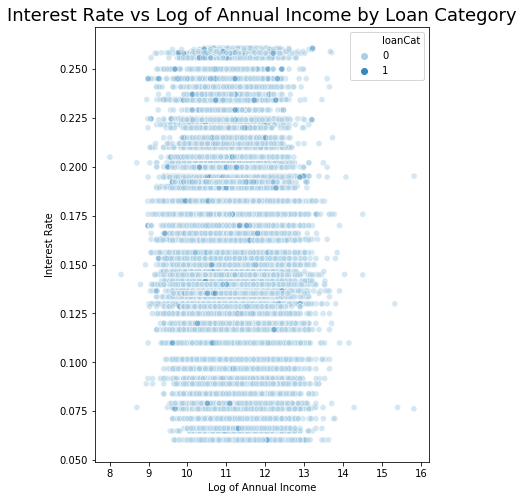

In [40]:
plt.figure(figsize=(6,8))
#Take the log of the Annual income to better visualize the relationship
sns.scatterplot(x='annualIncLog', y='new_Int', hue = 'loanCat', data=df, palette='Blues', alpha=.5)
plt.title('Interest Rate vs Log of Annual Income by Loan Category', fontsize=18)
plt.xlabel('Log of Annual Income')
plt.ylabel('Interest Rate')

In [41]:
# From the above plot, we can see that bad loans are more likely to have a higher interest rate. 
# In addition, there doesn't seem to be a relationship between annual income and the rate of bad loans.
# One reason for this can be that unless income is verified, the field is unreliable. 

# Decision Trees / Random Forest

In [42]:
#add another feature: state to region
stateRegion = pd.read_excel('state-geocodes-v2015-1.xls', header=5, names=['Region','Division','State','Name'])

In [43]:
regNameMap = stateRegion[stateRegion['Division'] ==0][ ['Region', 'Name']]

In [44]:
regNameMap.head()

,Region,Name
0,1,Northeast Region
12,2,Midwest Region
27,3,South Region
48,4,West Region


In [45]:
regStateMap = stateRegion[stateRegion['State'] !=0][['Region', 'Name']]

In [46]:
regStateMap.head()

,Region,Name
2,1,Connecticut
3,1,Maine
4,1,Massachusetts
5,1,New Hampshire
6,1,Rhode Island


In [47]:
regStateMap = regStateMap.merge(regNameMap, on='Region', how='left')
regStateMap.head()

,Region,Name_x,Name_y
0,1,Connecticut,Northeast Region
1,1,Maine,Northeast Region
2,1,Massachusetts,Northeast Region
3,1,New Hampshire,Northeast Region
4,1,Rhode Island,Northeast Region


In [48]:
regStateMap.columns= ['RegNo','State','Region']

In [49]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [50]:
stateAbv = pd.DataFrame.from_dict(us_state_abbrev, orient='index')
stateAbv.columns = ['Abbrev']
stateAbv.head()

,Abbrev
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [51]:
regStateMap = regStateMap.merge(stateAbv, left_on='State', right_index=True)

In [52]:
regStateMap.columns = ['No','State','Region','Abbrev']

In [53]:
regStateMap.head()

,No,State,Region,Abbrev
0,1,Connecticut,Northeast Region,CT
1,1,Maine,Northeast Region,ME
2,1,Massachusetts,Northeast Region,MA
3,1,New Hampshire,Northeast Region,NH
4,1,Rhode Island,Northeast Region,RI


In [54]:
df = df.merge(regStateMap, how='left', left_on='addr_state', right_on='Abbrev')

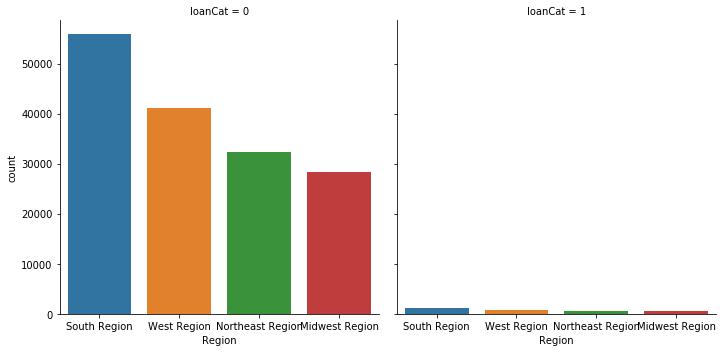

In [55]:
sns.catplot(x='Region', col='loanCat', data=df, kind='count')

In [56]:
#subset = ['new_Int', 'home_ownership', 'installment', 'annual_inc', 'loan_status', 'loanCat', 'delinq_2yrs', 'collections_12_mths_ex_med', 'pub_rec', 'mths_since_last_delinq', 'newRevUtil', 'revol_bal', 'loanCat', 'rate', 'total_rec_late_fee', 'inq_last_6mths']
subset = ['new_Int', 'home_ownership', 'purpose', 'installment', 'loanCat', 'delinq_2yrs', 
          'collections_12_mths_ex_med', 'pub_rec', 'mths_since_last_delinq', 'newRevUtil', 'revol_bal', 
          'total_rec_late_fee', 'inq_last_6mths', 'termMo', 'Region']


In [57]:
dfSub = df[subset]

In [58]:
# For this exercise, I will train a machine learning model to classify loans as "good" (fully paid) or "bad" (grace pd, late, default, charged off).

In [59]:
# The data has one categorical feature, excluding loan category. 
catFeats = ['home_ownership', 'purpose', 'Region']

In [60]:
dfFinal = pd.get_dummies(dfSub, columns=catFeats)

In [61]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161231 entries, 0 to 161230
Data columns (total 33 columns):
new_Int                       161231 non-null float64
installment                   161231 non-null float64
loanCat                       161231 non-null int64
delinq_2yrs                   161231 non-null int64
collections_12_mths_ex_med    161231 non-null int64
pub_rec                       161231 non-null int64
mths_since_last_delinq        81008 non-null float64
newRevUtil                    161147 non-null float64
revol_bal                     161231 non-null int64
total_rec_late_fee            161231 non-null float64
inq_last_6mths                161231 non-null int64
termMo                        161231 non-null int64
home_ownership_ANY            161231 non-null uint8
home_ownership_MORTGAGE       161231 non-null uint8
home_ownership_OWN            161231 non-null uint8
home_ownership_RENT           161231 non-null uint8
purpose_car                   161231 non-null ui

In [62]:
dfFinal.isna().sum()

new_Int                           0
installment                       0
loanCat                           0
delinq_2yrs                       0
collections_12_mths_ex_med        0
pub_rec                           0
mths_since_last_delinq        80223
newRevUtil                       84
revol_bal                         0
total_rec_late_fee                0
inq_last_6mths                    0
termMo                            0
home_ownership_ANY                0
home_ownership_MORTGAGE           0
home_ownership_OWN                0
home_ownership_RENT               0
purpose_car                       0
purpose_credit_card               0
purpose_debt_consolidation        0
purpose_home_improvement          0
purpose_house                     0
purpose_major_purchase            0
purpose_medical                   0
purpose_moving                    0
purpose_other                     0
purpose_renewable_energy          0
purpose_small_business            0
purpose_vacation            

In [63]:
dfFinal.dropna(subset=['newRevUtil', 'mths_since_last_delinq'], axis=0, inplace=True)

In [64]:
dfFinal.isna().sum()

new_Int                       0
installment                   0
loanCat                       0
delinq_2yrs                   0
collections_12_mths_ex_med    0
pub_rec                       0
mths_since_last_delinq        0
newRevUtil                    0
revol_bal                     0
total_rec_late_fee            0
inq_last_6mths                0
termMo                        0
home_ownership_ANY            0
home_ownership_MORTGAGE       0
home_ownership_OWN            0
home_ownership_RENT           0
purpose_car                   0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_home_improvement      0
purpose_house                 0
purpose_major_purchase        0
purpose_medical               0
purpose_moving                0
purpose_other                 0
purpose_renewable_energy      0
purpose_small_business        0
purpose_vacation              0
purpose_wedding               0
Region_Midwest Region         0
Region_Northeast Region       0
Region_S

In [65]:
#df_train = dfFinal[dfFinal['loan_status_Current']== 0]
#df_test = dfFinal[dfFinal['loan_status_Current']==1]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = dfFinal.drop(['loanCat'], axis=1)
y = dfFinal['loanCat']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
#X_train = pd.DataFrame(df_train.drop(['loanCat'], axis=1))
#y_train = pd.DataFrame(df_train['loanCat'])
#X_test = pd.DataFrame(df_test.drop(['loanCat'], axis=1))
#y_test = pd.DataFrame(df_test['loanCat'])

In [70]:
#from imblearn.over_sampling import SMOTE
#https://jair.org/index.php/jair/article/view/10302

#sm = SMOTE(random_state=12, ratio = 1.0)
#X_train_r, y_train_r = sm.fit_sample(X_train, y_train)

In [71]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

/Users/ethan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ethan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ethan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ethan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Train a decision tree model

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
predictions = dt.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     23773
           1       0.03      0.03      0.03       515

   micro avg       0.95      0.95      0.95     24288
   macro avg       0.50      0.50      0.50     24288
weighted avg       0.96      0.95      0.96     24288

[[23145   628]
 [  497    18]]


In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=600)

In [79]:
rfc.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [ ]:
print(rfc.feature_importances_)

In [ ]:
# Features that the model relied on: 0,1,5,6,7
plt.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Weight')

In [ ]:
# In a second iteration of the analysis, I would simplify the model by running the below feature set:

In [ ]:
subset[0], subset[1], subset[5], subset[6], subset[7]

# Anomalies

In [ ]:
sns.pairplot(vars=['loanCat', 'new_Int', 'installment', 'delinq_2yrs', 
                   'collections_12_mths_ex_med', 'pub_rec', 'mths_since_last_delinq', 'newRevUtil', 
                   'revol_bal', 'total_rec_late_fee', 'inq_last_6mths'], 
             hue='loanCat', data=df)

In [ ]:
#Looking at this plot, we can see the outliers in the data that could be causing issues with the model. 
#collections 12 mo > 10
#pub rec > 25
#newRevUtil > 3
#totalRecLateFee > 70

In [ ]:
sns.pairplot(vars=[ 'collections_12_mths_ex_med', 'pub_rec', 'newRevUtil', 
                'total_rec_late_fee'], 
             hue='loanCat', data=df)

In [ ]:
sns.countplot(df[df['collections_12_mths_ex_med']>0]['collections_12_mths_ex_med'])
plt.xlabel('Collections in the Past Twelve Months, Excluding Medical')
plt.title('Count of Collections in the Past 12 Months > 0')

In [ ]:
df = df[df['collections_12_mths_ex_med'] < 10]

In [ ]:
sns.countplot(df['pub_rec'])

In [ ]:
df = df[df['pub_rec'] < 25]

In [ ]:
df = df[df['newRevUtil'] < 3 ]

In [ ]:
df = df[df['total_rec_late_fee'] < 80 ]